<a href="https://colab.research.google.com/github/Eltallerdedatos/Eltallerdedatos/blob/main/MODELO_MRLG_Y_ESTIMACION_MCO_COMPROBACION_SUPUESTOS_NORMALIDAD_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
![/content/OriginalLogo.jpg]

/bin/bash: line 1: [/content/OriginalLogo.jpg]: No such file or directory


Estamos viendo el modelo de regresión lineal general (MRLG), en inglés: General Linear Model (GLM) y hemos descrito el proceso de estimación de sus coeficientes B, mediante Mínimos Cuadrados Ordinarios (MCO), en ingés Ordinary Least Squares (OLS)

Ya hemos visto el modelo de regresión general y analizado los coeficientes del model, los cuales tienen un papel primordial en el MRLG.

En el modelo de regresión lineal se requieren unos supuestos básicos para poder llevar a cabo un análisi correcto. Estos supuestos son:

**S1: Supuesto de linealidad**: Nos referimos a la linealidad con respecto a los coeficientes B0, B1, B2...Bk, y no con respecto a las variables.

**S2: La muestra tomada debe ser una muestra aleatoria** qeu sigue el modelo de regresión lineal.

**S3: No existe multicolinealidad.** No existen relaciones lineales exactas entre las variables regresoras. Tampoco puede ocurrir que alguna de las variables regresoras sea constante. Es decir, X es de rango completo.

**S4: Independencia y normalidad de los errores. **

**S5: Homocedasticidad y ausencia de correlación serial:** La varianza del error es constante para todos los variables de la muestra.

Para verificar los supuestos de la Regresión Lineal Simple (MRL), existen varias pruebas y métodos gráficos que permiten evaluar cada supuesto:

Para verificar los supuestos de la Regresión Lineal Simple (MRL), existen varias pruebas y métodos gráficos que permiten evaluar cada supuesto. Aquí te detallo las más comunes:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###MODELO DE REGRESIÓN LINEAL(MRLG) Y ESTIMACIÓN MÍNIMOS CUADRADOS ORDINARIOS (MCO)

In [34]:
# Clone the entire repo.
!git clone -l -s //git.github.com/Eltallerdedatos/MODELO-DE-REGRESION-LINEAL-MRLG-.git
%cd /Eltallerdedatos/MODELO-DE-REGRESION-LINEAL-MRLG-.git
!ls

fatal: repository '//git.github.com/Eltallerdedatos/MODELO-DE-REGRESION-LINEAL-MRLG-.git' does not exist
[Errno 2] No such file or directory: '/Eltallerdedatos/MODELO-DE-REGRESION-LINEAL-MRLG-.git'
/content
drive  OriginalLogo.jpg  sample_data


In [16]:
pip install numpy pandas statsmodels matplotlib scipy

###Instalamos las librerias necesarias

In [7]:
import numpy as np  # Biblioteca para cálculos numéricos y manejo de arreglos de datos
import pandas as pd  # Herramienta para manejo y análisis de datos en estructuras como DataFrames
import matplotlib.pyplot as plt  # Biblioteca de gráficos para visualización de datos (2D)
import seaborn as sns  # Biblioteca de visualización basada en Matplotlib con funciones para gráficos estadísticos
import statsmodels.api as sm  # Biblioteca para análisis estadístico, incluyendo modelos de regresión
from statsmodels.formula.api import ols  # Función específica de Statsmodels para realizar regresiones lineales usando fórmulas
from scipy.stats import shapiro, kstest, normaltest, jarque_bera  # Pruebas estadísticas para evaluar la normalidad de los datos




# Generar datos de ejemplo

In [8]:
# Generar datos de ejemplo
np.random.seed(0)
X = np.random.rand(100) * 10  # Variable independiente
y = 3 + 2 * X + np.random.randn(100) * 2  # Variable dependiente (con ruido)

# Crear un DataFrame para el análisis
data = pd.DataFrame({'X': X, 'Y': y})




In [9]:
data.head()  # Muestra las primeras 5 filas del DataFrame


,X,Y
0,5.488135,11.645970
1,7.151894,19.105440
2,6.027634,15.986592
3,5.448832,10.825176
4,4.236548,14.449600


In [10]:
data.describe()  # Muestra estadísticas básicas como media, desviación estándar, min, max, etc.


,X,Y
count,100.000000,100.000000
mean,4.727938,12.840545
std,2.897540,6.096767
min,0.046955,1.789268
25%,2.058032,7.306228
50%,4.674810,12.991166
75%,6.844833,17.349413
max,9.883738,26.338668


from matplotlib import pyplot as plt
_df_0['X'].plot(kind='hist', bins=20, title='X')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Y'].plot(kind='hist', bins=20, title='Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='X', y='Y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['X'].plot(kind='line', figsize=(8, 4), title='X')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Y'].plot(kind='line', figsize=(8, 4), title='Y')
plt.gca().spines[['top', 'right']].set_visible(False)

In [17]:
print(data)  # Muestra todo el DataFrame


           X          Y
0   5.488135  11.645970
1   7.151894  19.105440
2   6.027634  15.986592
3   5.448832  10.825176
4   4.236548  14.449600
..       ...        ...
95  1.831914   8.027016
96  5.865129  13.123439
97  0.201075   2.023051
98  8.289400  18.667736
99  0.046955   3.128868

[100 rows x 2 columns]


In [18]:
data.info()  # Muestra los tipos de datos y la cantidad de valores no nulos en cada columna


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   Y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [13]:
data.tail()  # Muestra las últimas 5 filas del DataFrame


,X,Y
95,1.831914,8.027016
96,5.865129,13.123439
97,0.201075,2.023051
98,8.289400,18.667736
99,0.046955,3.128868


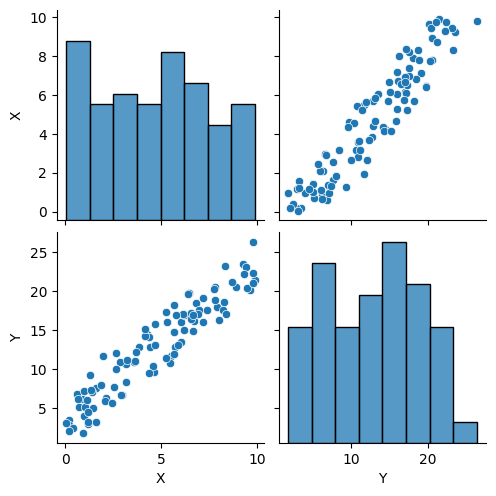

In [14]:
sns.pairplot(data)  # Visualiza distribuciones y relaciones entre las variables en el DataFrame
plt.show()


# Ajustar el modelo de Regresión Lineal

Presentamos el modelo de regresion lineal general (MRLG) y describimos el proceso de estimación de sus coeficientes de MRLG mediante Mínimos Cuadrados Ordinarios (MCO).

In [15]:

model = ols('Y ~ X', data).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     810.4
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           3.49e-49
Time:                        16:33:10   Log-Likelihood:                -210.83
No. Observations:                 100   AIC:                             425.7
Df Residuals:                      98   BIC:                             430.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4443      0.387      8.910      0.0

# Obtener los residuos y los valores ajustados


In [19]:
residuos = model.resid
valores_ajustados = model.fittedvalues

### S1.-Prueba de linealidad

Cuando nos referimos al modelo de regresion lineal nos estamos refiriendo a la linealidad con respectoa  los coeficientes B0, B1, B...y no con respecto a las variables.

### Gráfico de dispersión(Scatter plot)


Traza un gráfico de dispersión entre la variable dependiente ( Y ) y la independiente ( X ). Si los puntos se distribuyen en torno a una línea recta, esto sugiere que el supuesto de linealidad es razonable.



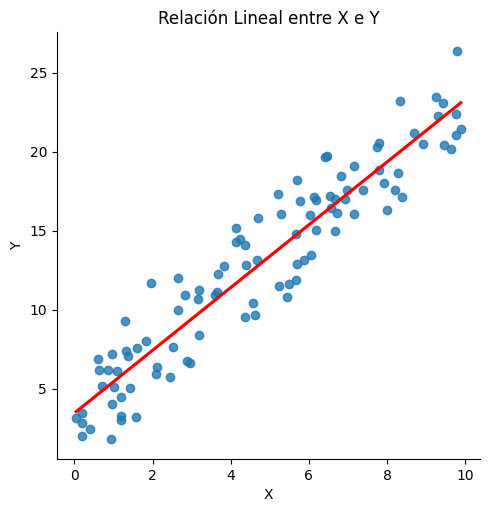

In [20]:

# Gráfico de dispersión con línea de regresión
sns.lmplot(x='X', y='Y', data=data, ci=None, line_kws={'color': 'red'})
plt.title('Relación Lineal entre X e Y')
plt.show()


### S2.- Muestra Aleatoria que Sigue el Modelo de Regresión Lineal


Este supuesto implica que la muestra utilizada debe ser representativa de la población y debe haber sido tomada de forma aleatoria. Esto no se puede verificar directamente en Python, pero es importante tener en cuenta cómo se selecciona la muestra para garantizar resultados válidos.

### S3.- No Existe Multicolinealidad (las variables son de rango completo)


La multicolinealidad ocurre cuando existen relaciones lineales fuertes entre las variables independientes. Este problema es exclusivo de la Regresión Lineal Múltiple y puede hacer que los coeficientes no se estimen de forma confiable.

Verificación en Python:
Para verificar la multicolinealidad, utilizamos el Factor de Inflación de la Varianza (VIF). Si el VIF de alguna variable es mayor a 10, es indicativo de multicolinealidad.
python

## Calcular VIF para cada variable independiente

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor




In [22]:
# Calcular VIF para cada variable independiente
variables_independientes = model.model.exog
vif = [variance_inflation_factor(variables_independientes, i) for i in range(variables_independientes.shape[1])]
print(vif)  # Valores de VIF para cada variable

[3.6893634470415524, 1.0]


Como nuestro en nuestro caso solo es una variable independiente, no hay problema de multicolinealidad.

###S4.- independencia de los errores

##Durbin-Watson Test


Para verificar la independencia de los errores, utilizamos el Durbin-Watson Test.
El estadístico de Durbin-Watson tiene un valor que siempre se encuentra entre 0 y 4:

DW ≈ 2: Indica que no hay autocorrelación significativa en los residuos (la situación ideal en regresión lineal).
DW < 2: Sugiere autocorrelación positiva en los residuos.
DW > 2: Sugiere autocorrelación negativa en los residuos.

La independencia de los residuos es crucial en regresión lineal porque la presencia de autocorrelación puede llevar a:

Subestimación de errores estándar: Esto resulta en intervalos de confianza más estrechos y p-valores más pequeños de lo real, lo cual puede llevar a conclusiones engañosas sobre la significancia de los predictores.

Predicciones menos confiables: En presencia de autocorrelación, las predicciones pueden estar sesgadas o ser inexactas.

In [23]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson Test
dw_statistic = durbin_watson(residuos)
print(f'Estadístico de Durbin-Watson: {dw_statistic:.2f}')



Estadístico de Durbin-Watson: 2.08


El estadístico de Durbin-Watson tiene un valor que siempre se encuentra entre 0 y 4:

DW ≈ 2: Indica que no hay autocorrelación significativa en los residuos (la situación ideal en regresión lineal).
DW < 2: Sugiere autocorrelación positiva en los residuos.
DW > 2: Sugiere autocorrelación negativa en los residuos.
Cómo interpretar el valor de 2.083
En nuestro caso, el valor de Durbin-Watson es aproximadamente 2.083, lo cual es muy cercano a 2, indicando que no hay una autocorrelación significativa en los residuos del modelo. Esto sugiere que los residuos son aproximadamente independientes y, por tanto, no presentan una autocorrelación problemática. **Este es un resultado positivo para el modelo, ya que respalda la validez de las suposiciones de independencia de los errores.**

###S4. Normalidad de los Errores

1.   Elemento de lista
2.   Elemento de lista



Para verificar la normalidad, realizamos un histograma, un gráfico Q-Q y la prueba de Shapiro-Wilk.

###Histograma de los residuosylabel('Frecuencia')


In [29]:
# Histograma de los residuosylabel('Frecuencia')
plt.show()




### Gráfico Q-Q de los residuos

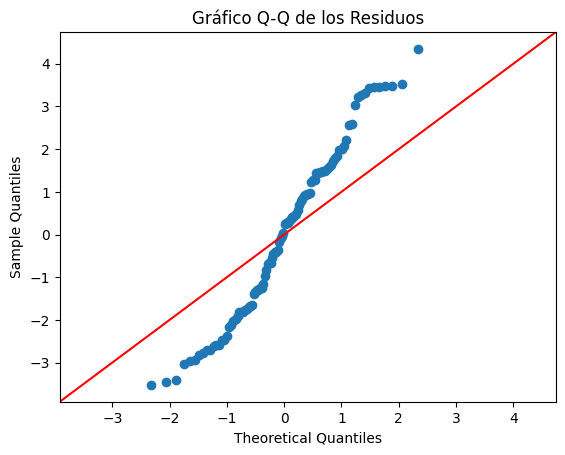

In [30]:

sm.qqplot(residuos, line='45')
plt.title('Gráfico Q-Q de los Residuos')
plt.show()



### Prueba de Shapiro-Wilk para normalidad

La prueba Shapiro-Wilk es una prueba estadística que evalúa la normalidad de los residuos en un modelo de regresión. Su propósito es comprobar si los residuos se distribuyen normalmente, lo cual es una suposición importante en muchos modelos de regresión, incluido el modelo de regresión lineal.
**Interpretación del p-valor en la prueba de Shapiro-Wilk**
p-valor > 0.05: No se rechaza la hipótesis nula de normalidad. Esto significa que no hay evidencia suficiente para decir que los residuos no son normales.
p-valor ≤ 0.05: Se rechaza la hipótesis nula, lo que sugiere que los residuos no siguen una distribución normal.



In [31]:

shapiro_test = shapiro(residuos)
print(f'Shapiro-Wilk p-valor: {shapiro_test.pvalue:.4f}')

Shapiro-Wilk p-valor: 0.0137


Si el p-valor de Shapiro-Wilk es mayor a 0.05, podemos asumir que los residuos siguen una distribución normal. en nuestro caso, dicha normalidad no existe.

Un p-valor de 0.0137 en la prueba de Shapiro-Wilk es menor a 0.05, lo que indica que hay evidencia para rechazar la hipótesis nula de normalidad de los residuos al nivel de significancia común del 5%.

Interpretación
Este resultado sugiere que los residuos no siguen una distribución normal. Esto puede ser una señal de que:

Los supuestos del modelo pueden no cumplirse completamente: La normalidad de los residuos es una suposición importante para hacer inferencias en regresión lineal, especialmente en lo que respecta a los intervalos de confianza y los p-valores.
Podrían existir valores atípicos o una estructura no lineal: La desviación de la normalidad a veces indica la presencia de valores atípicos o que la relación entre Y y X podría no ser completamente lineal.
**Acciones Posibles**
Visualizar los residuos: Usar gráficos como el histograma de residuos o el gráfico Q-Q para observar la naturaleza de la desviación de la normalidad.

Transformar las variables: Aplicar una transformación a Y o X (como logaritmo o raíz cuadrada) puede ayudar a mejorar la normalidad.

Usar un modelo alternativo: Si la no normalidad es sustancial, podrías considerar modelos robustos o modelos de regresión que no dependan de la normalidad de los residuos.

### Prueba de Anderson-Darling


La prueba de Anderson-Darling es una prueba estadística utilizada para evaluar la normalidad de una distribución. Es más sensible que otras pruebas de normalidad (como Shapiro-Wilk) en los extremos de la distribución, lo que la hace útil para detectar desviaciones en la cola de los datos.

Características de la prueba de Anderson-Darling
Hipótesis:

**Hipótesis nula (H₀)**: Los datos siguen una distribución normal.
**Hipótesis alternativa (H₁)**: Los datos no siguen una distribución normal.
**Estadístico de la prueba:** La prueba calcula un estadístico que mide la distancia entre la distribución de los datos y la distribución normal. Un estadístico mayor indica una mayor discrepancia con la normalidad.

**Valores críticos:** En lugar de un solo p-valor, la prueba de Anderson-Darling proporciona un estadístico de la prueba junto con valores críticos específicos para diferentes niveles de significancia (por ejemplo, 1%, 5%, 10%). Si el estadístico de la prueba es mayor que el valor crítico correspondiente, se rechaza la hipótesis nula de normalidad al nivel de significancia correspondiente.

In [ ]:
from scipy.stats import anderson

# Realizar la prueba de Anderson-Darling
anderson_result = anderson(residuos)

# Resultados de la prueba
print('\nPrueba de Anderson-Darling:')
print(f'Estadístico: {anderson_result.statistic:.4f}')
for i in range(len(anderson_result.critical_values)):
    print(f'Valor crítico (alfa={anderson_result.significance_level[i]}): {anderson_result.critical_values[i]:.4f}')
    if anderson_result.statistic < anderson_result.critical_values[i]:
        print('No se puede rechazar la hipótesis nula: los residuos siguen una distribución normal.')
    else:
        print('Se rechaza la hipótesis nula: los residuos no siguen una distribución normal.')



Prueba de Anderson-Darling:
Estadístico: 0.8329
Valor crítico (alfa=15.0): 0.5550
Se rechaza la hipótesis nula: los residuos no siguen una distribución normal.
Valor crítico (alfa=10.0): 0.6320
Se rechaza la hipótesis nula: los residuos no siguen una distribución normal.
Valor crítico (alfa=5.0): 0.7590
Se rechaza la hipótesis nula: los residuos no siguen una distribución normal.
Valor crítico (alfa=2.5): 0.8850
No se puede rechazar la hipótesis nula: los residuos siguen una distribución normal.
Valor crítico (alfa=1.0): 1.0530
No se puede rechazar la hipótesis nula: los residuos siguen una distribución normal.


Con los resultados de la prueba de Anderson-Darling, podemos interpretar la normalidad de los residuos a distintos niveles de significancia.

Interpretación detallada
**Estadístico de la prueba:** 0.8329
Este es el valor del estadístico de Anderson-Darling que se compara con los valores críticos en cada nivel de significancia para determinar si se puede rechazar la hipótesis nula de normalidad.

Comparación con valores críticos:

Alfa = 15.0% (0.5550): El estadístico es mayor que el valor crítico, por lo que se rechaza la hipótesis nula.
Alfa = 10.0% (0.6320): Nuevamente, se rechaza la hipótesis nula.
Alfa = 5.0% (0.7590): Se rechaza la hipótesis nula.
Alfa = 2.5% (0.8850): El estadístico es menor que el valor crítico, por lo que no se puede rechazar la hipótesis nula.
Alfa = 1.0% (1.0530): También no se puede rechazar la hipótesis nula.

A los niveles de significancia del 15%, 10% y 5%, el estadístico de Anderson-Darling (0.8329) es mayor que los valores críticos, lo que indica que los residuos no siguen una distribución normal.

A los niveles de significancia del 2.5% y 1%, el estadístico es menor que los valores críticos, lo que indica que no se puede rechazar la hipótesis nula de normalidad.
Niveles de significancia
Definición: El nivel de significancia (
𝛼
α) es la probabilidad de rechazar incorrectamente la hipótesis nula (cometer un error tipo I). Comúnmente, se establece en valores como 0.05 (5%), 0.01 (1%) o 0.10 (10%).

Niveles más pequeños son más estrictos: Sí, un nivel de significancia más pequeño (por ejemplo, 1% en comparación con 5%) es considerado más estricto porque se requiere más evidencia para rechazar la hipótesis nula. Un nivel de significancia más bajo significa que se está dispuesto a aceptar menos probabilidad de cometer un error tipo I, lo cual se traduce en una mayor rigidez para aceptar la hipótesis alternativa.

**Intervalo de confianza y nivel de significancia**
Un intervalo de confianza más amplio generalmente corresponde a un nivel de significancia más bajo:
Por ejemplo, un intervalo de confianza del 95% (que corresponde a un nivel de significancia del 5%) es más estrecho que un intervalo de confianza del 99% (que corresponde a un nivel de significancia del 1%).
Esto se debe a que al aumentar el nivel de confianza (y disminuir el nivel de significancia), se aumenta la incertidumbre y, por lo tanto, el intervalo se amplía para reflejar esto.

**Error y su relación con el nivel de significancia**

**Disminución del error tipo I: **Un nivel de significancia más bajo reduce la probabilidad de rechazar la hipótesis nula cuando es verdadera, lo que significa que se disminuye el error tipo I.
**Aumento de error tipo II:** Sin embargo, hay una relación inversa entre los errores tipo I y tipo II. Al ser más estrictos (es decir, reducir
𝛼
α), es posible aumentar la probabilidad de no rechazar la hipótesis nula cuando en realidad es falsa (cometer un error tipo II, o β).

**Niveles de significancia más bajos son más estrictos y disminuyen el riesgo de cometer un error tipo I.**
Intervalos de confianza más amplios se asocian con niveles de significancia más bajos.
Al hacer más estricta la prueba (disminuir α), puedes aumentar la probabilidad de cometer un **error tipo II.** Este error ocurre cuando se no se rechaza la hipótesis nula (H₀) cuando en realidad es falsa.
Esto crea un balance en la toma de decisiones estadísticas: aumentar la confianza en que un resultado es significativo puede disminuir la probabilidad de encontrar otros efectos reales. Por lo tanto, es importante seleccionar un nivel de significancia que sea apropiado para el contexto del estudio y las implicaciones prácticas de los errores.

###S5.- Homocedasticidad

# Calcular VIF para cada variable independiente
variables_independientes = model.model.exog
vif = [variance_inflation_factor(variables_independientes, i) for i in range(variables_independientes.shape[1])]
print(vif)  # Valores de VIF para cada variable

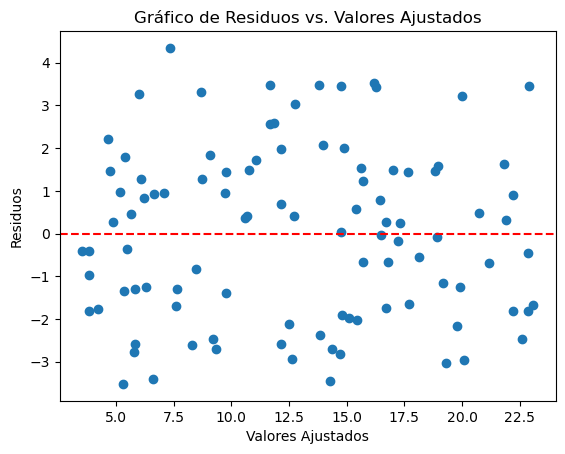

Breusch-Pagan p-valor: 0.8455


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Gráfico de Residuos vs. Valores Ajustados
plt.scatter(valores_ajustados, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Ajustados')
plt.show()

# Prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuos, model.model.exog)
print(f'Breusch-Pagan p-valor: {bp_test[1]:.4f}')


In [ ]:
Si el p-valor de Breusch-Pagan es bajo (p < 0.05), sugiere heterocedasticidad (varianza no constante). En nuestro caso, sí que podemos hablar de
homocedasticidad.

### Interpretación de Resultados

In [ ]:

S1. **Linealidad**: El gráfico de dispersión entre `X` y `Y` debe mostrar una línea recta clara.
S2: **Muestra Aleatoria que Sigue el Modelo de Regresión Lineal**
Este supuesto implica que la muestra utilizada debe ser representativa de la población y debe haber sido tomada de forma aleatoria.
Esto no se puede verificar directamente en Python, pero es importante tener en cuenta cómo se selecciona la muestra para garantizar resultados válidos.
S4. **Independencia de los errores**: Un valor de **Durbin-Watson** cercano a 2 confirma que no hay autocorrelación.
S4. **Normalidad de los errores**: El histograma, el gráfico Q-Q, y un p-valor alto en Shapiro-Wilk indicarían normalidad.
S5. **Homocedasticidad**: El gráfico de residuos debería mostrar una dispersión aleatoria y constante. Un p-valor bajo en Breusch-Pagan indicaría heterocedasticidad.